# Credit Risk Modelling Project

This notebook contains the steps and code for developing a credit risk model. The goal is to predict the likelihood of a borrower defaulting on a loan using various features from the dataset.

In [1]:
# Importing necessary libraries for data manipulation, visualization, and modeling
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.metrics import r2_score  # For evaluating regression models
from scipy.stats import chi2_contingency  # For chi-square test
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For checking multicollinearity
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.ensemble import RandomForestClassifier  # For classification model
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support  # For evaluating classification models
import warnings  # For suppressing warnings
import os  # For interacting with the operating system

# Optional: To suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

## Data Loading and Exploration

In this section, we load the dataset and perform initial exploration to understand the structure and distribution of the data.

In [2]:
# Loading the dataset
a1 = pd.read_excel("/Documents/Resume_Projects/Credit_Risk_Modeling/case_study1.xlsx")
a2 = pd.read_excel("/Documents/Resume_Projects/Credit_Risk_Modeling/case_study2.xlsx")

In [3]:
df1 = a1.copy()
df2 = a2.copy()

In [4]:
print(df1.shape)
print(df2.shape)

(51336, 26)
(51336, 62)


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [9]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [10]:
df1.isnull().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [11]:
df2.isnull().sum()

PROSPECTID                      0
time_since_recent_payment       0
time_since_first_deliquency     0
time_since_recent_deliquency    0
num_times_delinquent            0
                               ..
GL_Flag                         0
last_prod_enq2                  0
first_prod_enq2                 0
Credit_Score                    0
Approved_Flag                   0
Length: 62, dtype: int64

### Using Boxplot to Detect Discrepancies in Value Distribution

Boxplots are a powerful visualization tool for summarizing the distribution of a dataset and identifying potential outliers. By plotting a boxplot for each feature, we can quickly identify any discrepancies or unusual patterns in the data. This includes spotting null values, placeholder values such as -99999, or any other outliers that may indicate data quality issues.

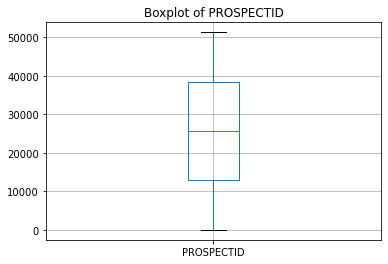

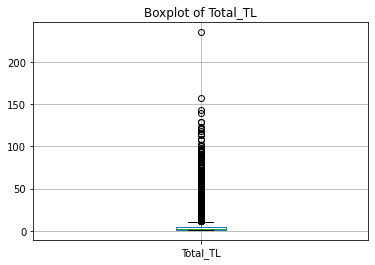

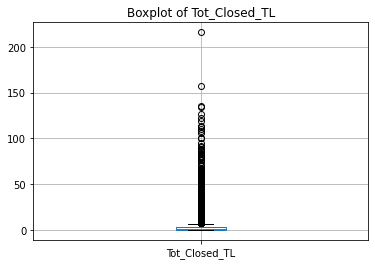

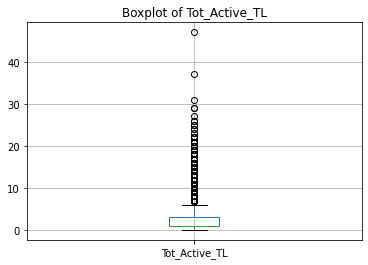

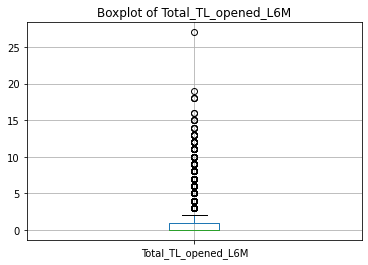

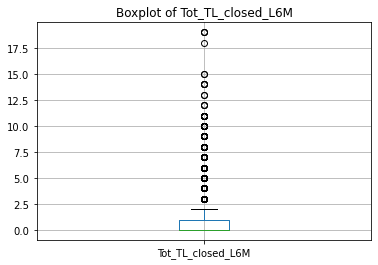

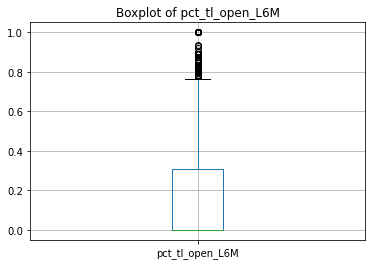

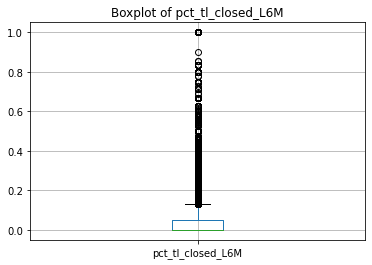

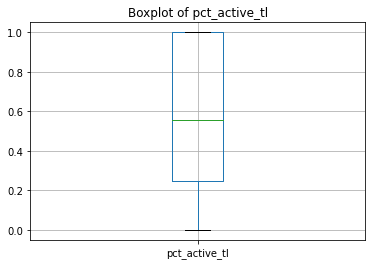

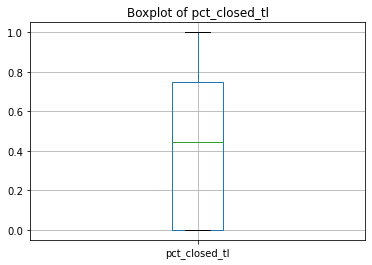

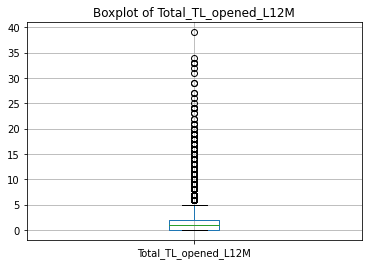

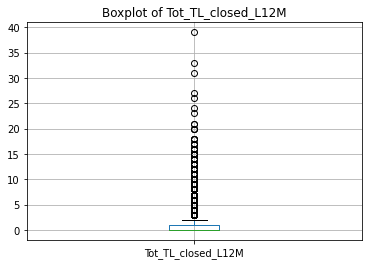

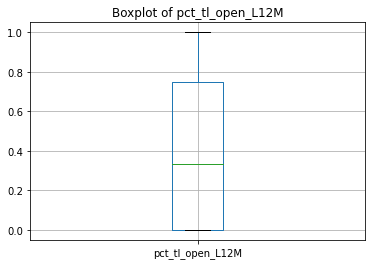

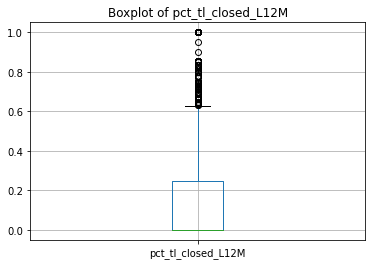

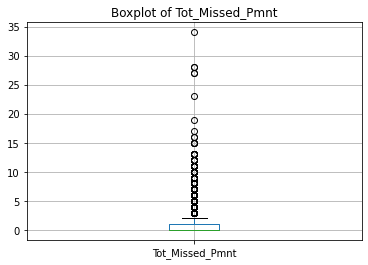

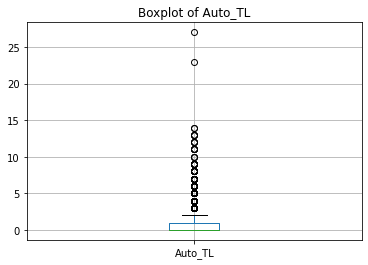

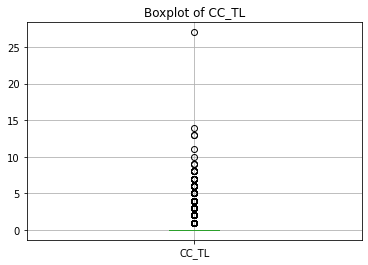

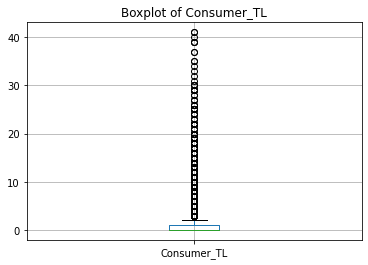

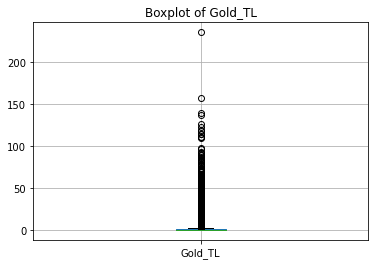

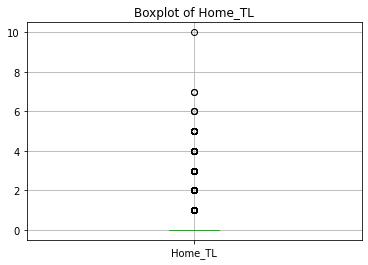

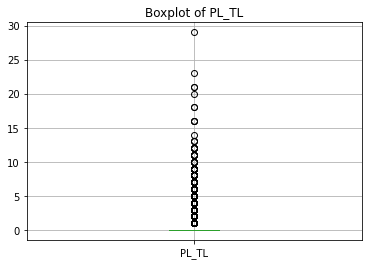

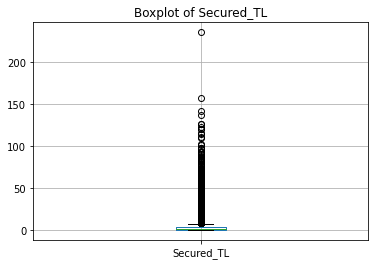

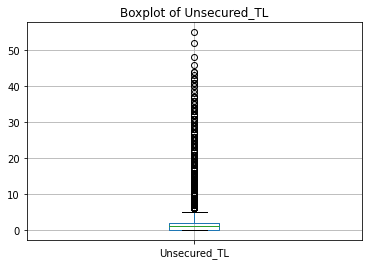

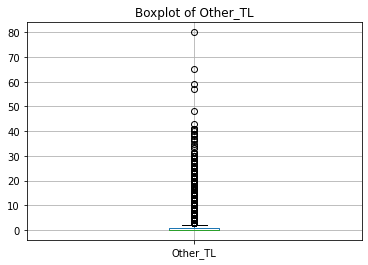

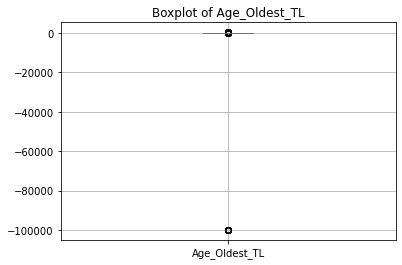

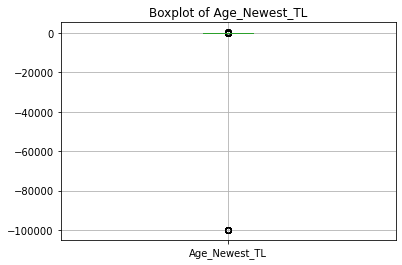

In [13]:
for column in df1.columns:
    df1.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [15]:
#removing object dtype columns for boxplot analysis.
df2temp = df2.drop(columns=['MARITALSTATUS','EDUCATION','GENDER','last_prod_enq2','first_prod_enq2','Approved_Flag'])

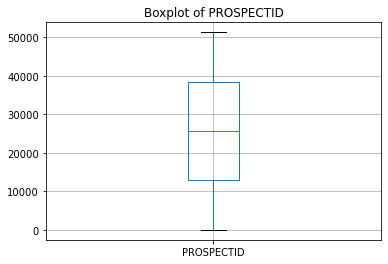

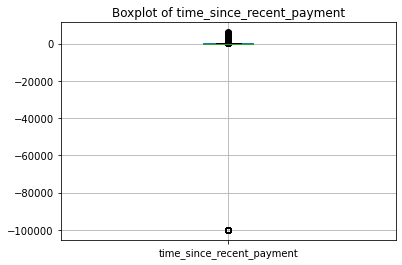

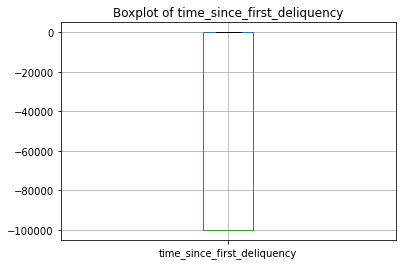

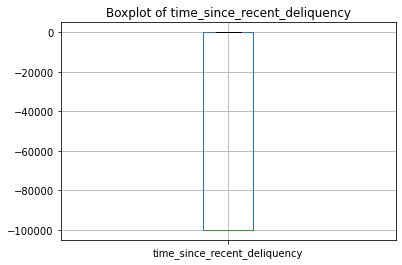

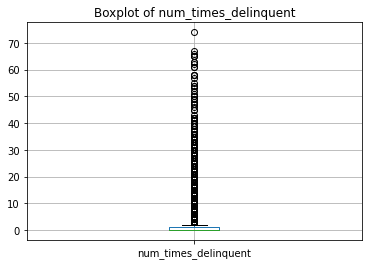

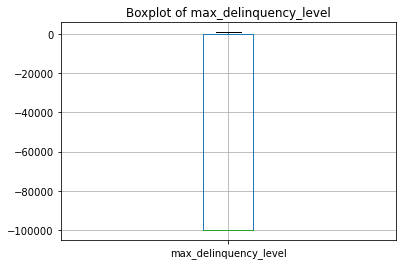

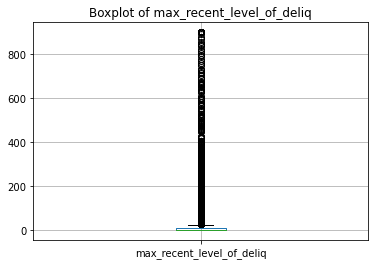

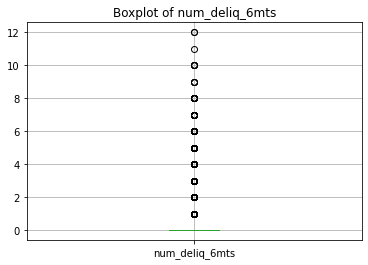

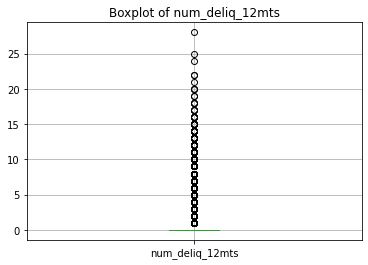

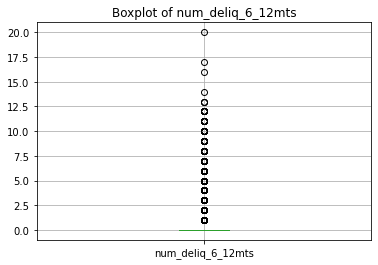

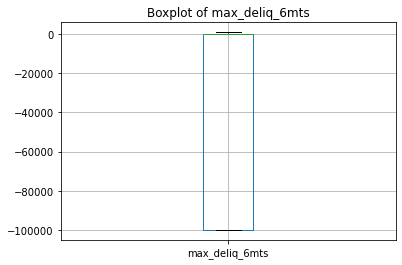

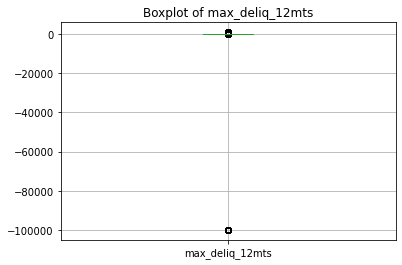

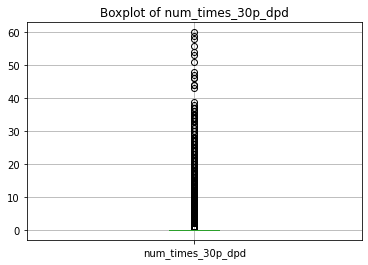

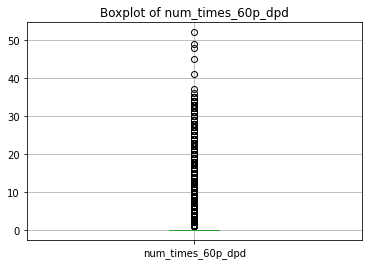

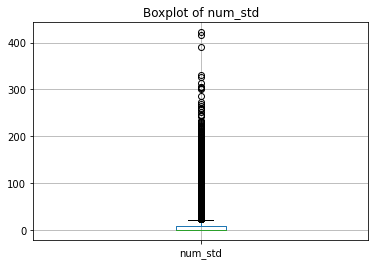

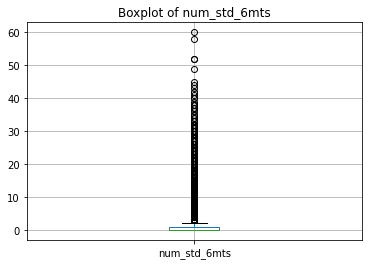

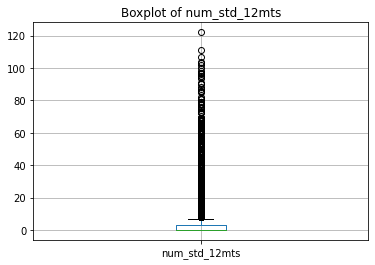

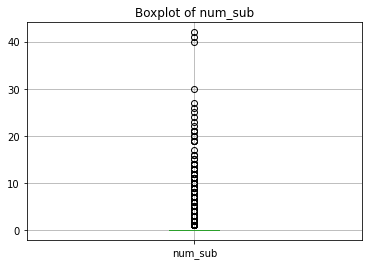

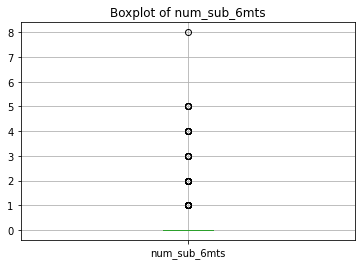

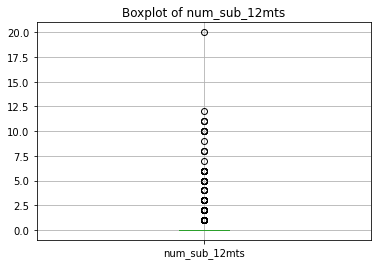

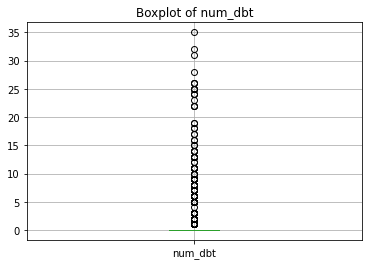

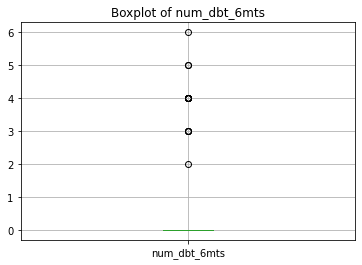

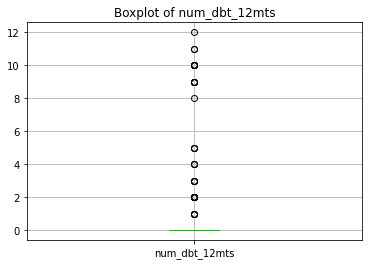

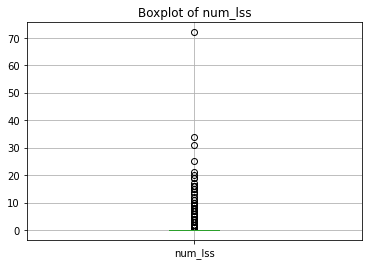

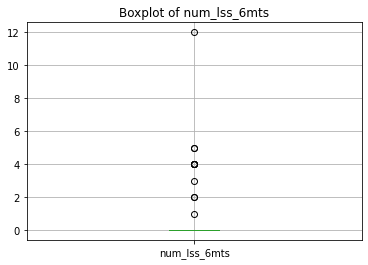

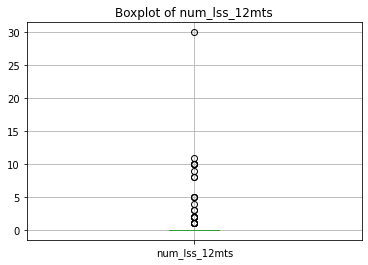

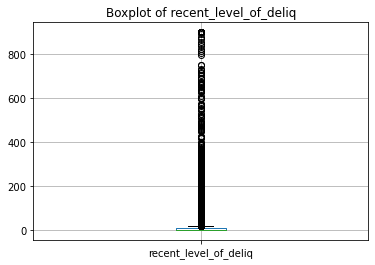

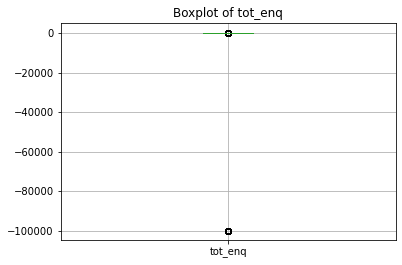

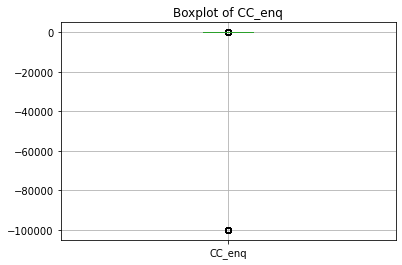

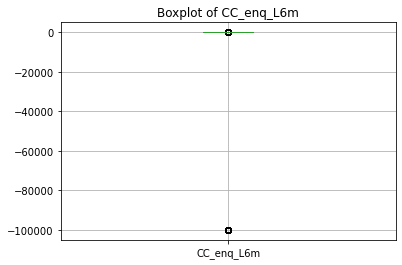

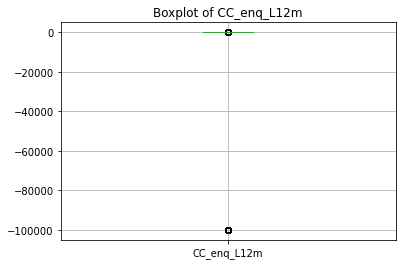

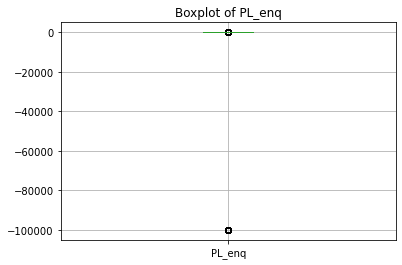

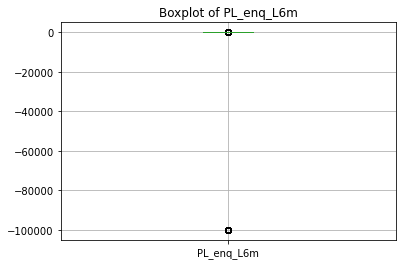

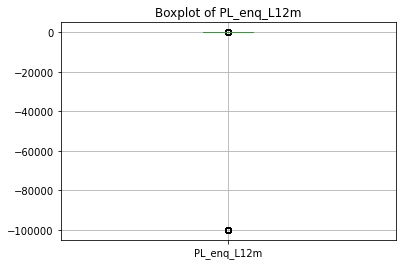

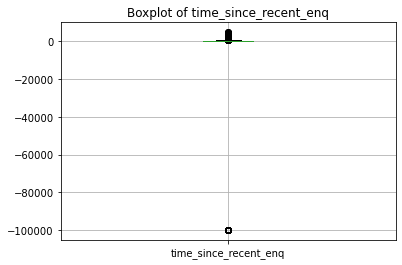

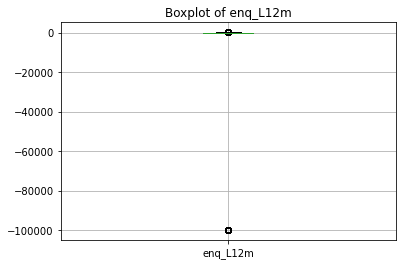

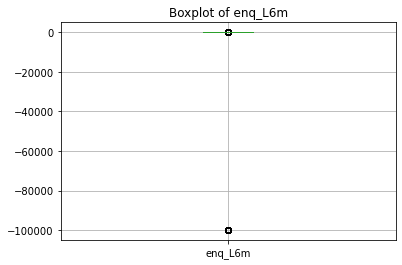

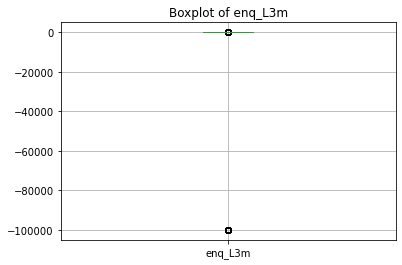

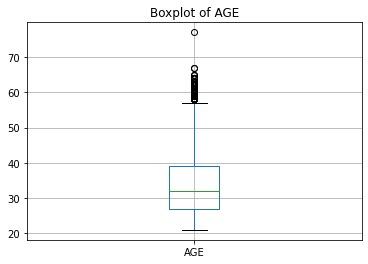

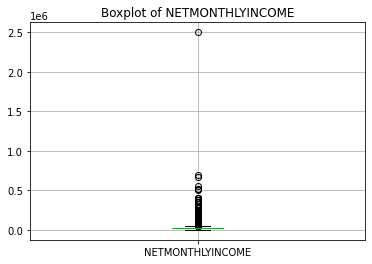

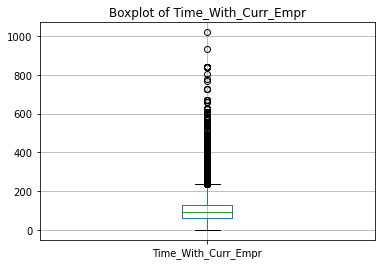

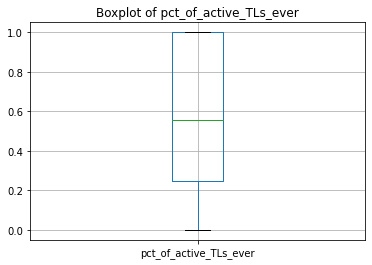

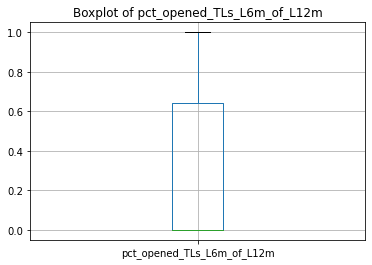

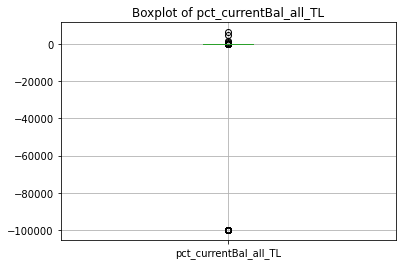

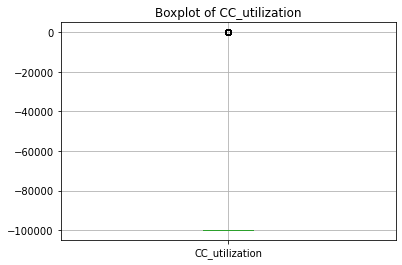

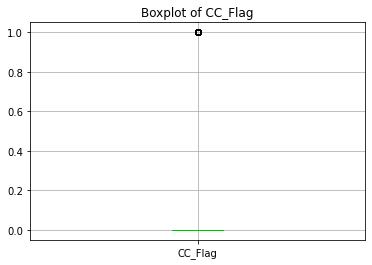

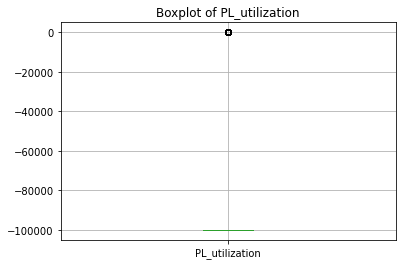

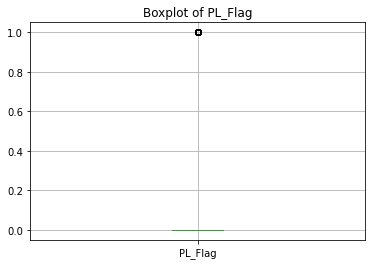

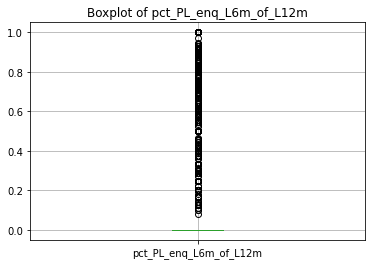

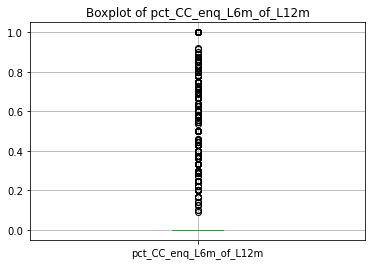

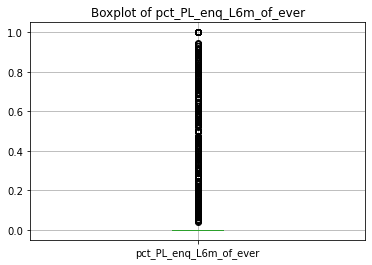

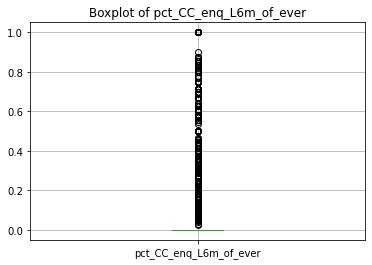

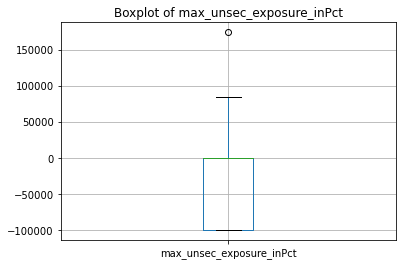

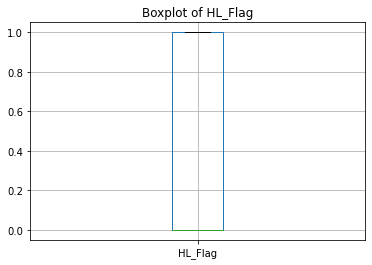

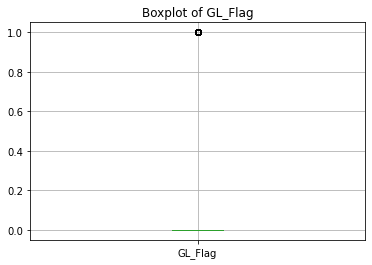

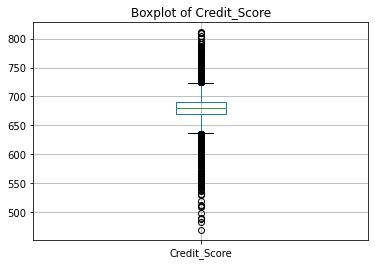

In [16]:
for column in df2temp.columns:
    df2temp.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

## Data Preprocessing
Data preprocessing is a crucial step to ensure the quality and consistency of the data. This includes handling missing values, encoding categorical variables, and scaling numerical features.

As per the boxplot results, we can infer further checking required columns. Name of the columns that needs to be checked are as mentioned below:
**df1** -> Age_Oldest_TL,Age_Newest_TL
**df2** -> time_since_recent_payment, time_since_first_deliquency, time_since_recent_deliquency, max_delinquency_level, max_deliq_6mts, max_deliq_12mts, tot_enq, CC_enq, CC_enq_L6m, CC_enq_L12m, PL_enq, PL_enq_L6m, PL_enq_L12m, time_since_recent_enq, enq_L12m, enq_L6m, enq_L3m, pct_currentBal_all_TL, CC_utilization, CC_Flag, PL_utilization, PL_Flag, max_unsec_exposure_inPct

**Researching further on df1 shortlisted columns

In [17]:
df1['Age_Oldest_TL'].unique()

array([    72,      7,     47,      5,    131,    150,     17,     36,
           16,     66,     64,     96,     49,     38,      9,      6,
          110,    138,      8,     92,     40,     11,     51,     59,
           37,    159,     10,     20,      4,     26,     19,     41,
           73,     45,     32,     33,     48,     18,     60,     14,
           83,     44,     24,     42,     39,     12,     27,     70,
           76,    120,    115,     46,     93,     56,     61,    113,
           67,     74,     22,    191,      3,     65,    192,     43,
           13,     29,    193,     98,     63,     58,     30,     23,
           69,     53,    145,     31,     77,    104,     87,     15,
           62,     21,     97,     34,     28,    137,     86,    124,
          129,     50,     35,      2,    102,    154,    148,    128,
           94,    107,    135,     81,     68,     78,    130,     91,
           71,     89,    123,    213,     88,     52,    175,      1,
      

In [18]:
df1['Age_Oldest_TL'].value_counts()[-99999]

40

This represents a very small chunk in out data. So we can remove the rows, where this specific column has -99999 values in it.

In [19]:
df1['Age_Newest_TL'].value_counts()[-99999]

40

Here we are seeing, that both the columns have 40 rows where this column is missing the values. There is a possibility of a total overlap among them. How to check? We can compare the list of prospectids and see if they are same.

In [22]:
prospectid_list = df1[df1['Age_Oldest_TL'] == -99999]['PROSPECTID'].unique().tolist()
print(' '.join(map(str, prospectid_list)))
print()
prospectid_list = df1[df1['Age_Newest_TL'] == -99999]['PROSPECTID'].unique().tolist()
print(' '.join(map(str, prospectid_list)))

533 805 1180 3300 5695 5952 9080 10004 10860 12018 12479 12604 15249 16904 21699 22650 23273 24410 25779 26229 28496 29035 29839 29901 30733 32049 33013 34898 36156 36706 37909 39098 39748 41267 42864 45681 46778 46955 50292 50805

533 805 1180 3300 5695 5952 9080 10004 10860 12018 12479 12604 15249 16904 21699 22650 23273 24410 25779 26229 28496 29035 29839 29901 30733 32049 33013 34898 36156 36706 37909 39098 39748 41267 42864 45681 46778 46955 50292 50805


In [23]:
#removing nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [24]:
df1.shape

(51296, 26)

**Researching further on df2 shortlisted columns

We can ignore the columns having -99999 values for more than 10k count

In [28]:
columns_to_be_removed = []

for column in df2.columns:
    if df2.loc[df2[column] == -99999].shape[0] > 10000:
        columns_to_be_removed.append(column)
        
print(columns_to_be_removed)

['time_since_first_deliquency', 'time_since_recent_deliquency', 'max_delinquency_level', 'max_deliq_6mts', 'max_deliq_12mts', 'CC_utilization', 'PL_utilization', 'max_unsec_exposure_inPct']


In [35]:
df2 = df2.drop(columns_to_be_removed, axis=1)
df2.shape

(51336, 54)

Now, for the remaining columns where -99999 values are for less than 10k rows. we can remove the rows. That won't make a huge difference.

In [36]:
for column in df2.columns:
    df2 = df2.loc[df2[column] != -99999]

df2.shape

(42066, 54)

Now, df1 and df2 are ready. They have a common id i.e. PROSPECTID. We can do inner join using PROSPECTID.

In [37]:
# Merging the two dataframes, inner join so that no nulls are present
df = pd. merge(df1, df2, how ='inner', left_on=['PROSPECTID'], right_on=['PROSPECTID'])
df.shape

(42064, 79)

Now, we need to check how many columns are categorical and how many are numerical.

In [38]:
#Checking for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


## Chi-Square Test

The chi-square test is a statistical method used to determine if there is a significant association between two categorical variables. It compares the observed frequencies of events with the expected frequencies if there were no association between the variables.

### When to Perform

The chi-square test is performed when you have two categorical variables from a single population and want to test if they are independent. It's commonly used in hypothesis testing to evaluate relationships in contingency tables.

### Steps Involved

1. **Create a contingency table** of observed frequencies.
2. **Calculate the expected frequencies** assuming independence.
3. **Compute the chi-square statistic**: sum of the squared difference between observed and expected frequencies, divided by the expected frequencies.
4. **Compare the statistic to the chi-square distribution** to determine the p-value.

A low p-value (typically < 0.05) indicates a significant association between the variables.

In [39]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


Since all the categorical features have pval <=0.05, we will accept all

## Variance Inflation Factor (VIF)

### When to Use:
VIF is used to detect multicollinearity in regression analysis, where predictor variables are highly correlated with each other.

### How to Interpret:
- VIF measures how much the variance of a regression coefficient is inflated due to collinearity with other predictors.
- VIF values greater than 10 indicate high multicollinearity, suggesting that the predictor may need closer examination.
- VIF values closer to 1 indicate low multicollinearity.

### Steps:
1. Fit a regression model with all predictors.
2. Calculate VIF for each predictor to assess multicollinearity.

In [40]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [41]:
# VIF sequentially check
vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

for i in range (0,total_columns):
    vif_value = variance_inflation_factor(vif_data.to_numpy(),column_index)
    print (column_index,'---',vif_value)
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

0 --- inf
0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790933
0 --- 5.149501618212625
1 --- 2.611111040579735
2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.099653381646727
3 --- 5.581352009642762
4 --- 1.9855843530987785
5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.384346405965583
7 --- 3.0646584155234238
8 --- 2.898639771299253
9 --- 4.377876915347322
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438
15 --- inf
15 --- 7.380634506427232
15 --- 1.4210050015175733
16 --- 8.083255010190316
16 --- 1.624122752404011
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.8258570471324314
18 --- 1.5080839450032661
19 --- 2.172088834824577
20 --- 2.6233975535272283
21 --- 2.2959970812106167
22 --- 7.360578319196439
22 --- 2.160238777310255
23 --- 2.8686288267891467
24 

In [42]:
print(columns_to_be_kept)

['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'num_lss_12mts', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_currentBal_all_TL', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag']


## ANOVA (Analysis of Variance)

### When to Use:
ANOVA is used to determine whether there are any statistically significant differences between the means of two or more independent groups.

### How to Interpret:
- The ANOVA test produces an F-statistic and a p-value.
- **F-statistic**: Measures the ratio of the variance between groups to the variance within groups. Higher values indicate more significant differences between group means.
- **p-value**: Indicates the significance level of the F-statistic. A p-value less than a chosen significance level (e.g., 0.05) suggests that there are significant differences between group means.

### Assumptions:
- Independence of observations.
- Normally distributed data within each group.
- Homogeneity of variances across groups.

### Steps:
1. Formulate null and alternative hypotheses.
2. Compute the F-statistic and p-value using an appropriate statistical test (e.g., one-way ANOVA, two-way ANOVA).
3. Interpret results based on the p-value:
   - If p-value < significance level, reject the null hypothesis and conclude there are significant differences between group means.
   - If p-value >= significance level, fail to reject the null hypothesis.

In [43]:
# checking Anova for columns_to_be_kept 

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])  
    b = list(df['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']

    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [44]:
print(columns_to_be_kept)

['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'num_lss_12mts', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_currentBal_all_TL', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag']


Feature selection is done for cat and num features.

In [45]:
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [46]:
# Label encoding for the categorical features
# ['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']

# df['MARITALSTATUS'].unique()    
# df['EDUCATION'].unique()
# df['GENDER'].unique()
# df['last_prod_enq2'].unique()
# df['first_prod_enq2'].unique()

# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3

#Need to perform label-encoding for ordinal feature
#Need to perform one-hot encoding for nominal features

In [47]:
#label-encoding for ordinal feature
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']] = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']] = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']] = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']] = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']] = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']] = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']] = 3

In [48]:
df['EDUCATION'] = df['EDUCATION'].astype(int) #type-casting

In [49]:
#one-hot encoding for nominal features
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [50]:
df_encoded.describe()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION,MARITALSTATUS_Married,MARITALSTATUS_Single,GENDER_F,GENDER_M,last_prod_enq2_AL,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.00000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,4.206400e+04,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,0.179032,0.097783,0.825504,0.160365,0.525746,0.145921,0.076241,0.328000,2.921334,2.341646,1.116489,46.498074,13.970046,218.601607,14.314758,0.336963,0.438879,3.279978,0.063831,0.002211,0.009224,0.02451,0.004279,0.016713,11.803918,0.268924,0.779194,264.854507,1.230458,2.692990e+04,110.345783,0.102962,0.193063,0.195497,0.064186,0.252235,0.056580,2.313689,0.734262,0.265738,0.112186,0.887814,0.032165,0.052182,0.391784,0.019732,0.179560,0.324577,0.062785,0.047261,0.263289,0.030644,0.105339,0.490681
std,0.278043,0.210957,1.537208,0.258831,1.106442,0.549314,0.358582,0.916368,6.379764,3.405397,2.486801,42.109230,18.835191,422.282417,54.056303,1.097356,2.148400,7.566312,0.799989,0.081704,0.220786,0.62189,0.184461,0.573762,46.422091,1.019459,1.802092,466.585002,2.069461,2.084300e+04,75.629967,0.303913,0.394707,0.367414,0.225989,0.434300,0.231042,0.871070,0.441731,0.441731,0.315599,0.315599,0.176441,0.222397,0.488155,0.139079,0.383825,0.468222,0.242579,0.212200,0.440423,0.172353,0.306994,0.499919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.800000e+04,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,34.000000,7.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,1.000000,2.400000e+04,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## Model Building

Here we build the credit risk model using various machine learning algorithms.

### 1. Random Forest

In [51]:
y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'], axis=1)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.7636990372043266

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469203

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.8569075937785909

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



### 2. XGBoost

In [55]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

label_encoder.fit_transform(y): Transforms the target variable y into numeric labels. This is necessary because the XGBoost classifier requires numeric labels for the target variable.

In [56]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

y = df_encoded['Approved_Flag']
x = df_encoded. drop(['Approved_Flag'], axis=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [57]:
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.78

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660173

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665036

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.3749428440786465

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



### 3. Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.71

Class p1:
Precision: 0.7214566929133859
Recall: 0.722879684418146
F1 Score: 0.722167487684729

Class p2:
Precision: 0.8088664203772118
Recall: 0.8245787908820614
F1 Score: 0.8166470357283078

Class p3:
Precision: 0.33914421553090335
Recall: 0.3230188679245283
F1 Score: 0.33088519520680326

Class p4:
Precision: 0.6481854838709677
Recall: 0.6248785228377065
F1 Score: 0.6363186541316179



**XGBOOST** is giving the best results so far. Let's focus on finetuning the model

### Applying standard scaler

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column

In [64]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'], axis = 1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.78
Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660173

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665036

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.3749428440786465

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



Not much improvement in the metircs. Let's do hyperparameter tuning through GridSearchCV

In [66]:
# Hyperparameter tuning in xgboost
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
           

In [67]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [68]:
# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7811719957209081


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}